In [61]:
import pandas as pd

# Load the dataset
file_path = 'C:/vscode/ML_Practice/train_Regression.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [63]:
# 결측값 처리 함수
def handle_missing_values(df):
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        if missing_count > 0:
            # 열의 데이터 타입 확인
            if df[column].dtype in ['float64', 'int64']:
                # 수치형 데이터: 중앙값으로 대체
                df[column].fillna(df[column].median(), inplace=True)
                
                # 평균값
                #df[column].fillna(df[column].mean(), inplace=True)

                #특정 값
                #df[column].fillna(0, inplace=True)  # 0으로 대체

                #평균 값과 중앙값의 평균
                #df[column].fillna((df[column].mean() + df[column].median()) / 2, inplace=True)

            else:
                # 범주형 데이터: 최빈값으로 대체
                df[column].fillna(df[column].mode()[0], inplace=True)

                # 특정 값
                # df[column].fillna('Unknown', inplace=True)

                # 다른열의 값으로 대체(조건부)
                # 예: 특정 기준에 따라 'Alley'의 결측값 대체
                #df[column].fillna(df['Street'].map({'Pave': 'Paved_Alley', 'Grvl': 'Gravel_Alley'}), inplace=True)


                #행 삭제 
                #df.dropna(subset=[column], inplace=True)
    return df

# 처리 전 결측값 확인
print("Before handling missing values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# 결측값 처리
data = handle_missing_values(data)

# 처리 후 결측값 확인
print("\nAfter handling missing values:")
print(data.isnull().sum()[data.isnull().sum() > 0])


Before handling missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

After handling missing values:
Series([], dtype: int64)


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [71]:
# 범주형 열 확인
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# 범주형 데이터 인코딩 (One-Hot Encoding 사용)
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


Categorical columns: Index([], dtype='object')


In [72]:
X = data.drop(columns=['SalePrice'])  # 'SalePrice'를 레이블로 분리
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [74]:
y_pred = model.predict(X_test)

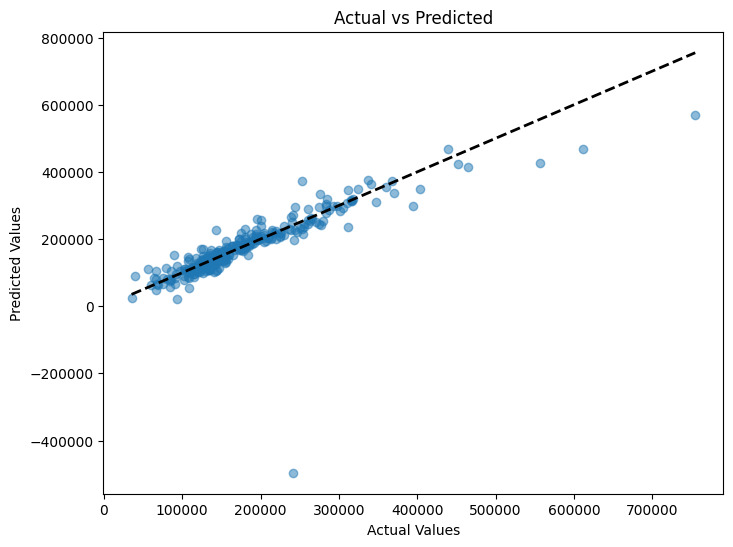

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()